In [45]:
import pandas as pd
pd.options.display.max_columns = 999
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("maryland_accident_dataset_by_report_no.csv")
df.tail()

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,VEHICLE_ID,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE
29588,MCP2526000L,N,Apparently Asleep,No Misuse,Y,Possible Incapacitating Injury,e0715157-51da-4266-bfeb-9dbb80117fba,D,Shoulder/Lap Belt(s),M,40840738-5b3e-4c2f-b56c-430b6e2875a6,Single Vehicle,N,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-11-15 15:34:00,28.0
29589,AC2051000K,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,15f07506-e12b-4b2a-aa31-44635150d1c2,D,Shoulder/Lap Belt(s),M,fbbdb263-5979-4a02-bf49-88a840fd8e2e,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-12-19 22:40:00,42.0
29590,ADI5630003,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,63529935-542d-4c69-af1f-1b3e49894090,D,Shoulder/Lap Belt(s),M,acfa1fcd-e286-4e64-ba2b-36894375ccc8,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,One o'clock,(Sport) Utility Vehicle,Superficial,N,Slowing or Stopping,2015-10-22 18:00:00,51.0
29591,HM0146000D,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,400dc255-6c26-4e47-9f75-920439556f0b,D,Shoulder/Lap Belt(s),M,1075765b-229c-478a-8d42-b4d41ec35309,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided","Mud, Dirt, Gravel",Clear,One o'clock,(Sport) Utility Vehicle,Disabling,Y,Moving Constant Speed,2015-11-29 22:45:00,26.0
29592,MCP1519000S,N,Influenced by Medications and/or Drugs and/or ...,Belt(s) Misused,Y,Possible Incapacitating Injury,6dbbc5b4-3922-4726-ae9f-d4140e986ea4,D,Shoulder/Lap Belt(s),M,cec5b365-1040-4898-8943-fa9259c1189c,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-12-03 02:42:00,45.0


In [3]:
list(df.columns)

['REPORT_NO',
 'CDL_FLAG',
 'CONDITION_CODE',
 'EQUIP_PROB_CODE',
 'FAULT_FLAG',
 'INJ_SEVER_CODE',
 'PERSON_ID',
 'PERSON_TYPE',
 'SAF_EQUIP_CODE',
 'SEX_CODE',
 'VEHICLE_ID',
 'COLLISION_TYPE_CODE',
 'C_M_ZONE_FLAG',
 'JUNCTION_CODE',
 'LANE_CODE',
 'LIGHT_CODE',
 'RD_COND_CODE',
 'RD_DIV_CODE',
 'SURF_COND_CODE',
 'WEATHER_CODE',
 'AREA_DAMAGED_CODE_MAIN',
 'BODY_TYPE_CODE',
 'DAMAGE_CODE',
 'HIT_AND_RUN_FLAG',
 'MOVEMENT_CODE',
 'TIME',
 'AGE']

In [4]:
for column in list(df.columns):
    print("\n", column,":\n", df[column].unique())


 REPORT_NO :
 ['AB36760008' 'AC1022000M' 'AC2017000W' ..., 'ADI5630003' 'HM0146000D'
 'MCP1519000S']

 CDL_FLAG :
 ['N' 'Y']

 CONDITION_CODE :
 ['Apparently Normal' 'Had Been Drinking' 'Physical Defects' 'Using Drugs'
 'Other Handicaps' 'Ill' 'Fatigued Fainted' 'Apparently Asleep'
 'Emotional Depressed Angry Disturbed'
 'Influenced by Medications and/or Drugs and/or Alcohol']

 EQUIP_PROB_CODE :
 ['No Misuse' 'Belt(s) Misused' 'Air Bag Failed' 'Facing Wrong Way'
 'Not Strapped Right' 'Size/Type Improper' 'Not Anchored Right'
 'Belts/Anchors Broken']

 FAULT_FLAG :
 ['N' 'Y']

 INJ_SEVER_CODE :
 ['No Injury' 'Possible Incapacitating Injury' 'Non-incapacitating Injury'
 'Incapacitating/Disabled Injury' 'Fatal Injury']

 PERSON_ID :
 ['a33f1d87-624c-4608-a11e-84d03ecd067a'
 'a6c44772-fd8f-47d5-95ba-25c143766037'
 '517a3a6f-3d0d-4cda-8e42-836efaf5f55d' ...,
 '63529935-542d-4c69-af1f-1b3e49894090'
 '400dc255-6c26-4e47-9f75-920439556f0b'
 '6dbbc5b4-3922-4726-ae9f-d4140e986ea4']

 PERSON_TY

# EDA

In [5]:
person_damage_type = df[['INJ_SEVER_CODE']].groupby(df['INJ_SEVER_CODE']).count()
person_damage_type.rename(columns = {'INJ_SEVER_CODE':'Count'})

,Count
INJ_SEVER_CODE,
Fatal Injury,26
Incapacitating/Disabled Injury,239
No Injury,24451
Non-incapacitating Injury,1751
Possible Incapacitating Injury,3126


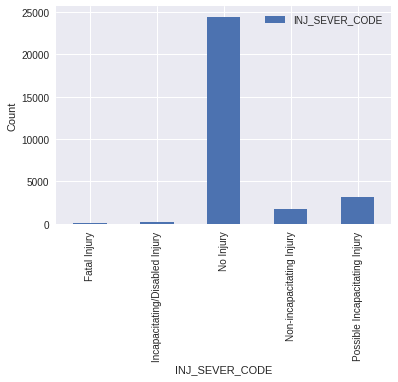

In [6]:
fig1 = person_damage_type.plot.bar()
fig1.set_ylabel("Count")
plt.show()

> Fatal injury, Incapacitating/Disabled Injury를 줄일 수 있는 방안을 찾아보자

In [7]:
vehicle_damage_type = df[['DAMAGE_CODE']].groupby(df['DAMAGE_CODE']).count()
vehicle_damage_type.rename(columns = {'DAMAGE_CODE':'Count'})

,Count
DAMAGE_CODE,
Destroyed,1786
Disabling,12413
Functional,7777
No Damage,742
Superficial,6875


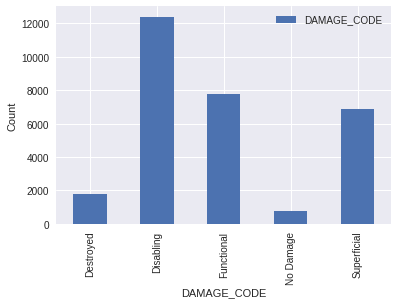

In [8]:
fig2 = vehicle_damage_type.plot.bar()
fig2.set_ylabel("Count")
plt.show()

> 사람의 부상정도와 차량의 파손정도는 다른 양상을 보인다. 차는 크게 파손되었지만 사람은 별로 다치지 않은 경우가 많다. 
물론 현재 데이터에 '운전자' 정보만 들어가 있으므로 보행자 부상 여부는 알 수 없다. 하지만 안전벨트, 차량의 충격 흡수 등에 따라 운전자는 상대적으로 안전하게 보호받는 것을 알 수 있다.

In [9]:
no_injury_df = df[df["INJ_SEVER_CODE"] == "No Injury"]
fatal_df = df[df["INJ_SEVER_CODE"] == "Fatal Injury"]
disabled_df = df[df["INJ_SEVER_CODE"] == "Incapacitating/Disabled Injury"]

In [80]:
want_to_visualize = ['
 'CONDITION_CODE',
 'EQUIP_PROB_CODE',
 'INJ_SEVER_CODE',
 'SAF_EQUIP_CODE',
 'COLLISION_TYPE_CODE',
 'C_M_ZONE_FLAG',
 'JUNCTION_CODE',
 'LANE_CODE',
 'LIGHT_CODE',
 'RD_COND_CODE',
 'RD_DIV_CODE',
 'SURF_COND_CODE',
 'WEATHER_CODE',
 'AREA_DAMAGED_CODE_MAIN',
 'BODY_TYPE_CODE',
 'DAMAGE_CODE',
 'MOVEMENT_CODE',]

Index(['REPORT_NO', 'CDL_FLAG', 'CONDITION_CODE', 'EQUIP_PROB_CODE',
       'FAULT_FLAG', 'INJ_SEVER_CODE', 'PERSON_ID', 'PERSON_TYPE',
       'SAF_EQUIP_CODE', 'SEX_CODE', 'VEHICLE_ID', 'COLLISION_TYPE_CODE',
       'C_M_ZONE_FLAG', 'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE',
       'RD_COND_CODE', 'RD_DIV_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'DAMAGE_CODE',
       'HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'TIME', 'AGE'],
      dtype='object')

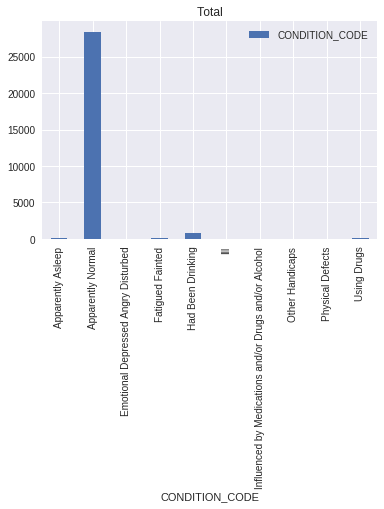

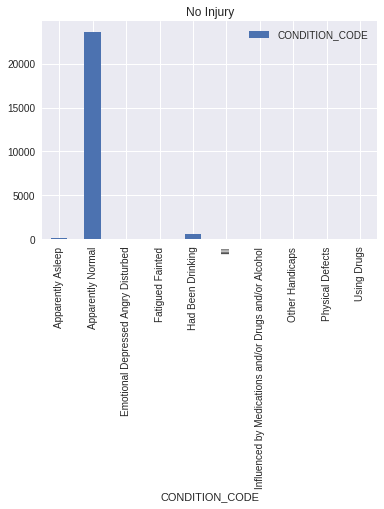

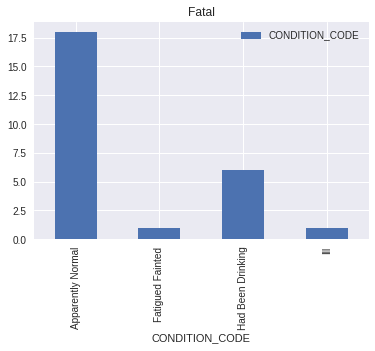

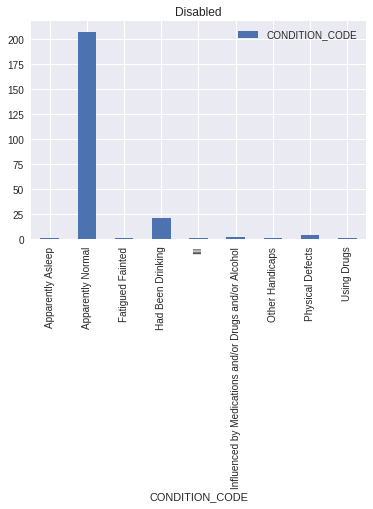

************************************************************************************************************************


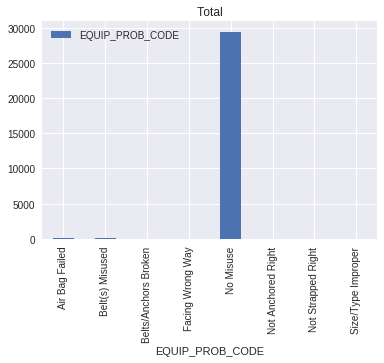

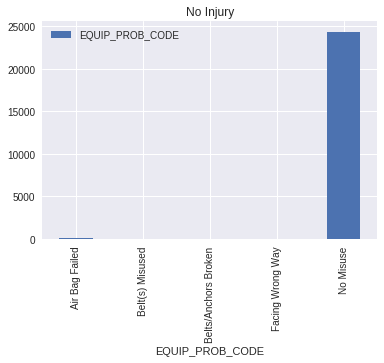

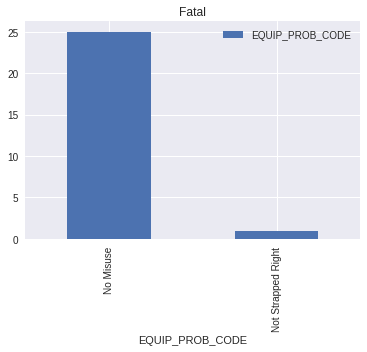

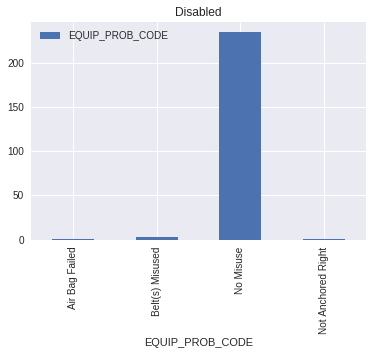

************************************************************************************************************************


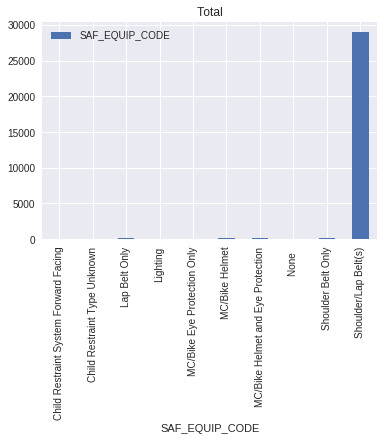

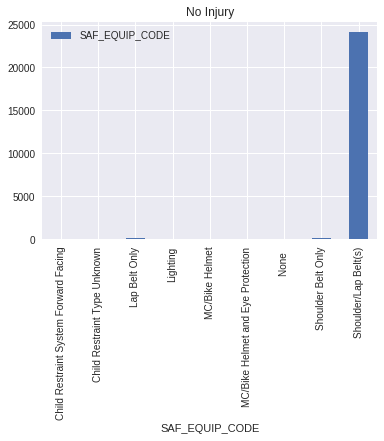

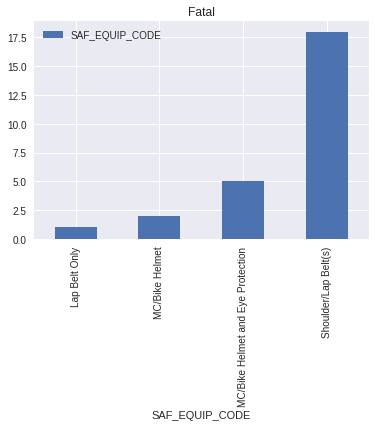

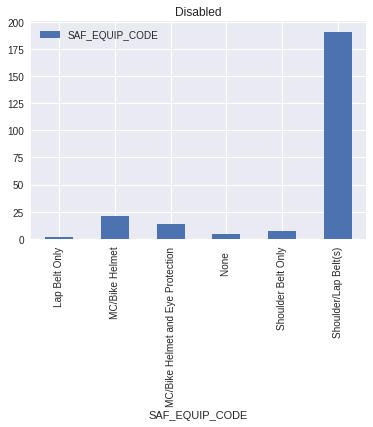

************************************************************************************************************************


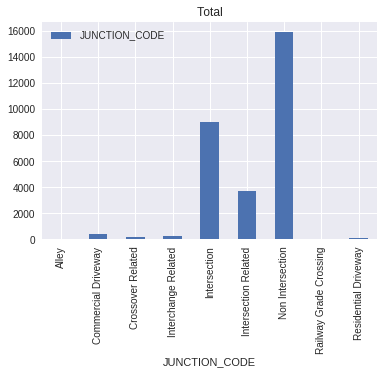

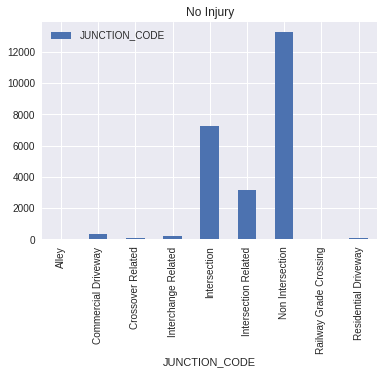

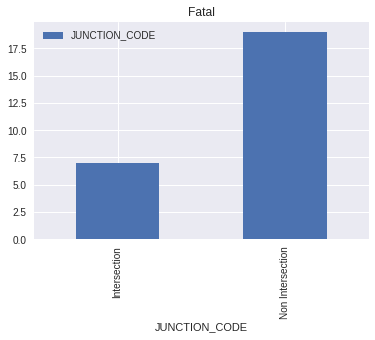

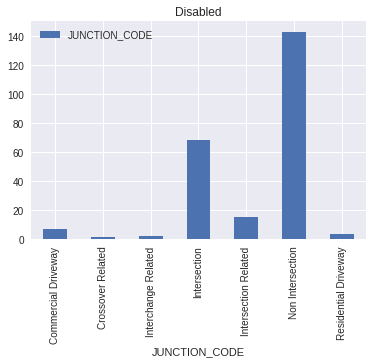

************************************************************************************************************************


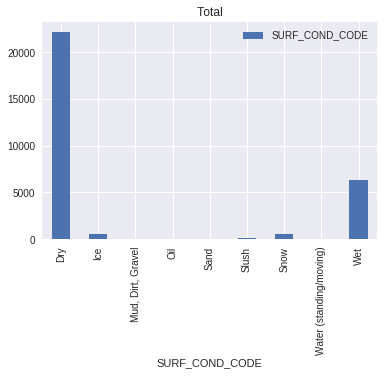

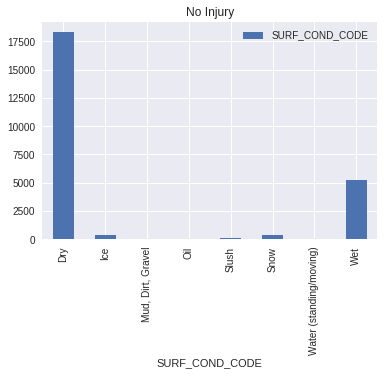

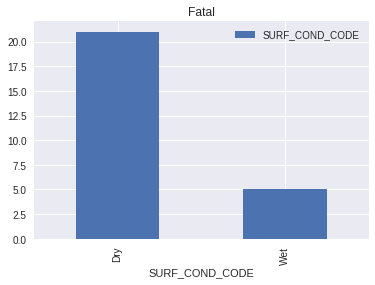

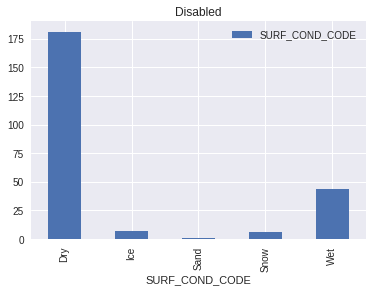

************************************************************************************************************************


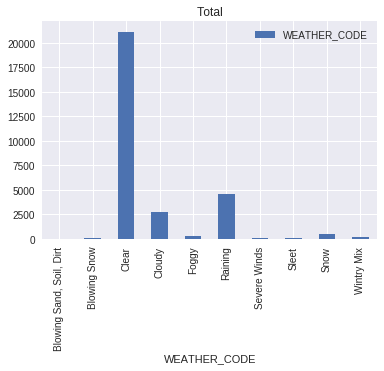

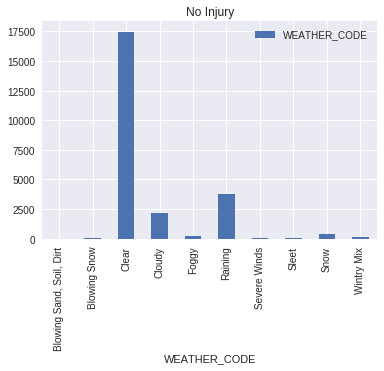

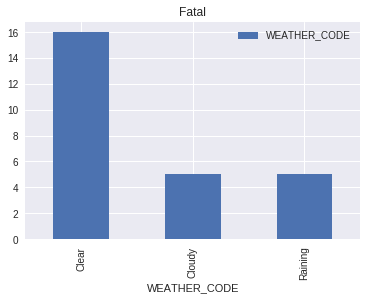

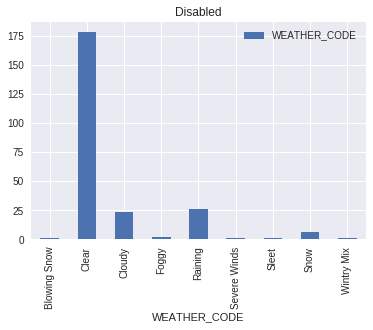

************************************************************************************************************************


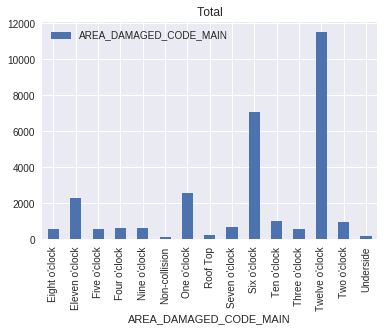

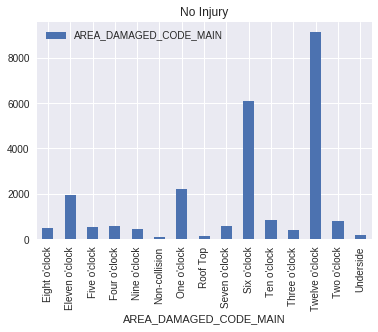

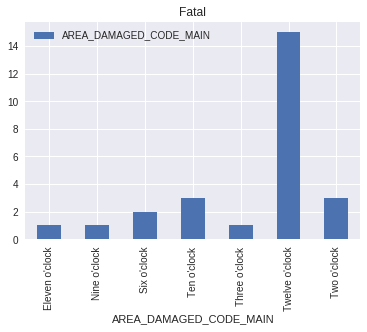

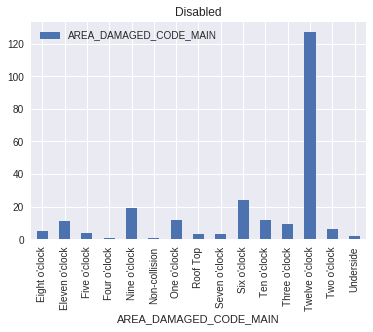

************************************************************************************************************************


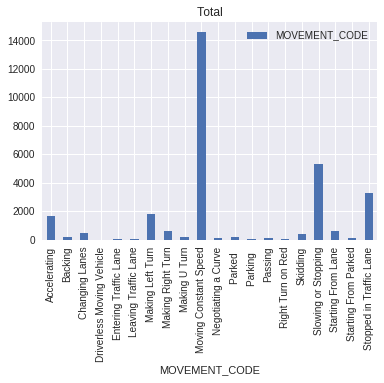

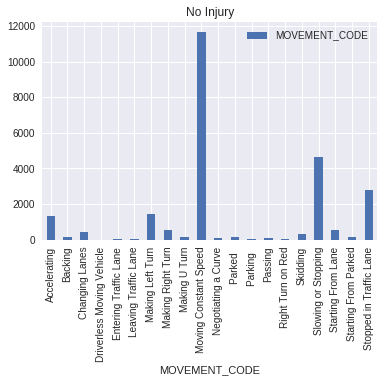

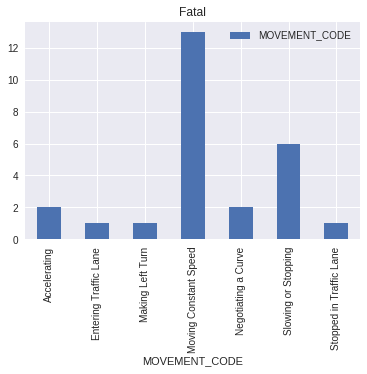

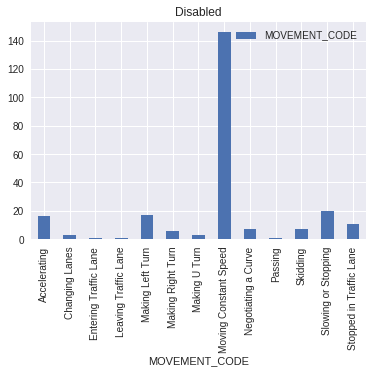

************************************************************************************************************************


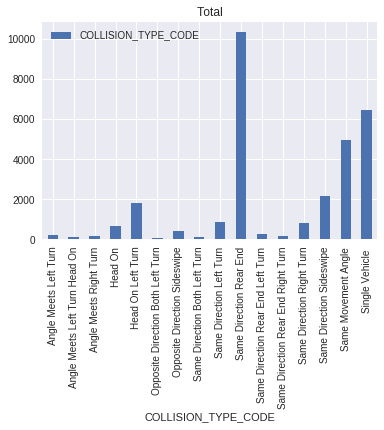

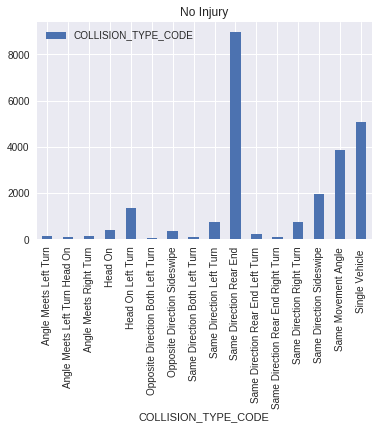

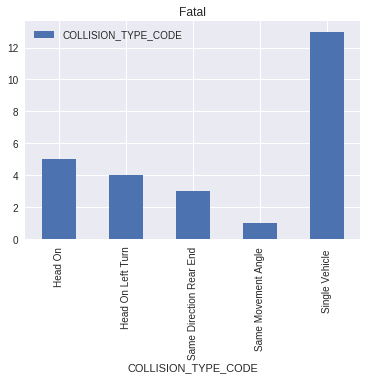

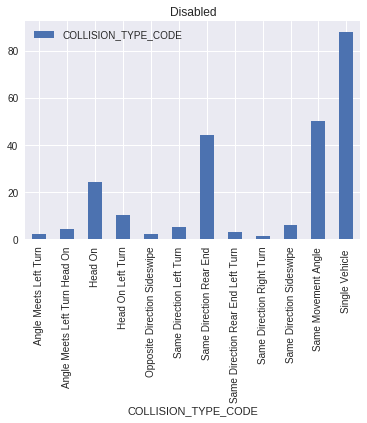

************************************************************************************************************************


In [89]:
for col in want_to_visualize:
    total_surf_type = df[[col]].groupby(df[col]).count()
    total_surf_type.plot.bar()
    plt.title("Total")

    no_injury_surf_type = no_injury_df[[col]].groupby(df[col]).count()
    no_injury_surf_type.plot.bar()
    plt.title("No Injury")

    fatal_surf_type = fatal_df[[col]].groupby(df[col]).count()
    fatal_surf_type.plot.bar()
    plt.title("Fatal")

    disabled_surf_type = disabled_df[[col]].groupby(df[col]).count()
    disabled_surf_type.plot.bar()
    plt.title("Disabled")
    plt.show()
    print("*"*120)
    

> ### surf condition

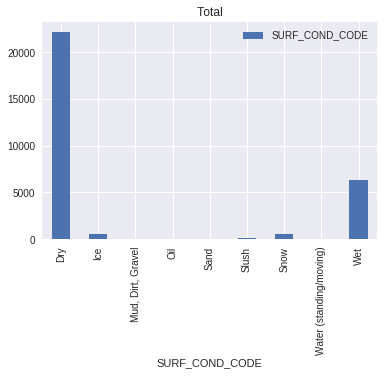

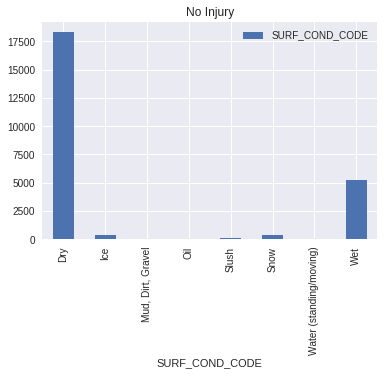

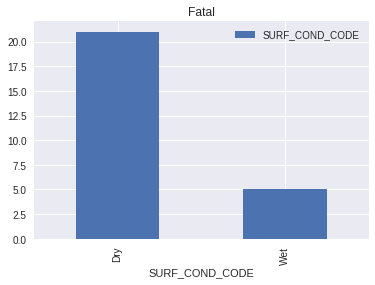

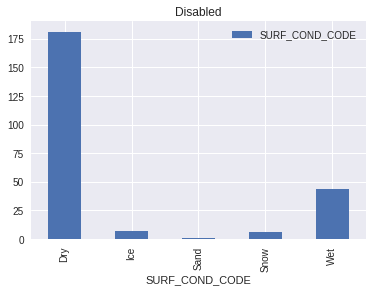

In [72]:
total_surf_type = df[["SURF_COND_CODE"]].groupby(df['SURF_COND_CODE']).count()
total_surf_type.plot.bar()
plt.title("Total")

no_injury_surf_type = no_injury_df[["SURF_COND_CODE"]].groupby(df['SURF_COND_CODE']).count()
no_injury_surf_type.plot.bar()
plt.title("No Injury")

fatal_surf_type = fatal_df[["SURF_COND_CODE"]].groupby(df['SURF_COND_CODE']).count()
fatal_surf_type.plot.bar()
plt.title("Fatal")

disabled_surf_type = disabled_df[["SURF_COND_CODE"]].groupby(df['SURF_COND_CODE']).count()
disabled_surf_type.plot.bar()
plt.title("Disabled")

plt.show()

> ### movement condition

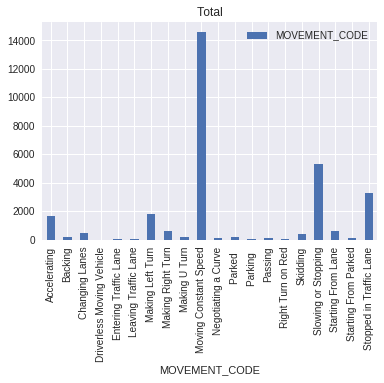

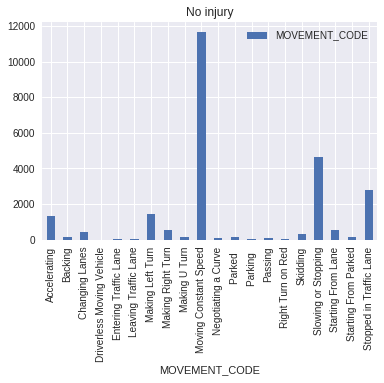

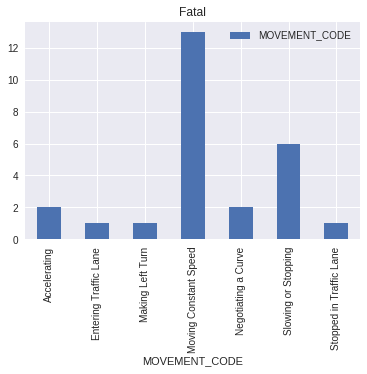

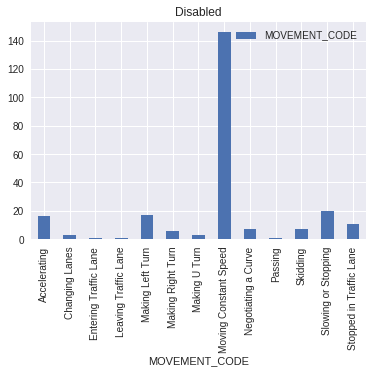

In [76]:
total_movement_type = df[["MOVEMENT_CODE"]].groupby(df['MOVEMENT_CODE']).count()
total_movement_type.plot.bar()
plt.title("Total")

no_injury_movement_type = no_injury_df[["MOVEMENT_CODE"]].groupby(df['MOVEMENT_CODE']).count()
no_injury_movement_type.plot.bar()
plt.title("No injury")

fatal_movement_type = fatal_df[["MOVEMENT_CODE"]].groupby(df['MOVEMENT_CODE']).count()
fatal_movement_type.plot.bar()
plt.title("Fatal")

disabled_movement_type = disabled_df[["MOVEMENT_CODE"]].groupby(df['MOVEMENT_CODE']).count()
disabled_movement_type.plot.bar()
plt.title("Disabled")

plt.show()

> ### collision type

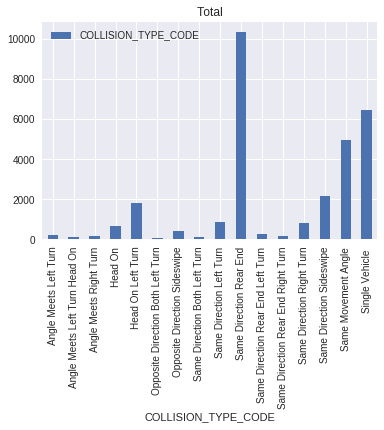

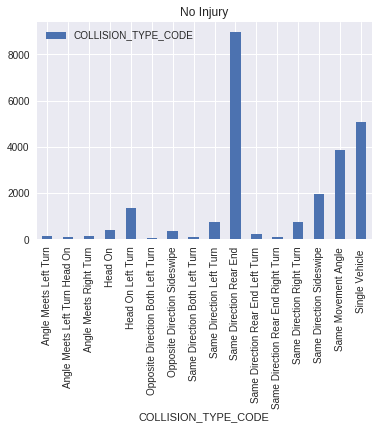

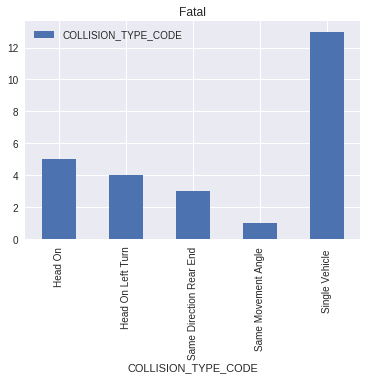

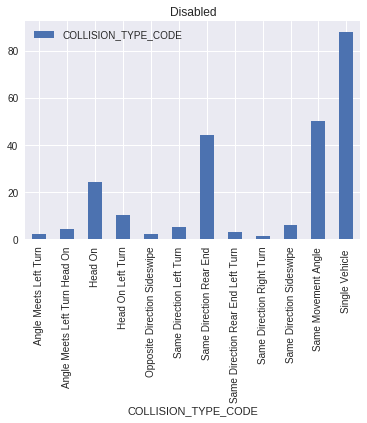

In [77]:
total_collision_type = df[["COLLISION_TYPE_CODE"]].groupby(df['COLLISION_TYPE_CODE']).count()
total_collision_type.plot.bar()
plt.title("Total")

no_injury_collision_type = no_injury_df[["COLLISION_TYPE_CODE"]].groupby(df['COLLISION_TYPE_CODE']).count()
no_injury_collision_type.plot.bar()
plt.title("No Injury")

fatal_collision_type = fatal_df[["COLLISION_TYPE_CODE"]].groupby(df['COLLISION_TYPE_CODE']).count()
fatal_collision_type.plot.bar()
plt.title("Fatal")

disabled_collision_type = disabled_df[["COLLISION_TYPE_CODE"]].groupby(df['COLLISION_TYPE_CODE']).count()
disabled_collision_type.plot.bar()
plt.title("Disabled")

plt.show()

> fatal, disabled injury의 경우 dry, wet날씨에 single vehicle이 사고를 일으킨 경우가 압도적으로 많았다. 특히 had been drinking driver가 혼자 구조물 등을 들이받아 사고를 낸 single vehicle 경우가 많았다. 12o'clock 사고가 다수!

# Preprocessing

> 분석에 사용할 변수를 선택하는 작업은 자의적이다. 도메인 전문가가 아니므로 보건복지부 자료를 바탕으로 변수를 분류, 선택해보았다.

- 첫번째, 사람에 의한 원인
 - (1) 음주운전
 - (2) 졸음 및 피로운전
 - (3) 기타 요인 (약물복용 중 사고나, 운전 중 기존 질환의 악화나 발생으로 인한 사고)
 - (4) 기타...
 
 
- 두번째, 보호 장구 미착용 요인
 - (1) 안전벨트 착용
 - (2) 에어백
 - (3) 안전의자
 - (4) 헬멧 착용
 - (5) 기타...
 
 
- 세번째, 환경적 요인
 - (1) 날씨
 - (2) 노면상태
 - (3) 기타...

### convert hour

In [96]:
from datetime import datetime

convert_hour = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour
df['TIME'] = df["TIME"].apply(convert_hour)

### classify time period

In [97]:
time_period = df["TIME"].copy()

time_period[(0<=df['TIME']) & (df['TIME']<6)] = 'DAWN'
time_period[(6<=df['TIME']) & (df['TIME']<12)] = 'MORNING'
time_period[(12<=df['TIME']) & (df['TIME']<18)] = 'AFTERNOON'
time_period[(18<=df['TIME'])] = 'EVENING'
df['TIME_PERIOD'] = time_period
df.tail()

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,VEHICLE_ID,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE,TIME_PERIOD
29588,MCP2526000L,N,Apparently Asleep,No Misuse,Y,Possible Incapacitating Injury,e0715157-51da-4266-bfeb-9dbb80117fba,D,Shoulder/Lap Belt(s),M,40840738-5b3e-4c2f-b56c-430b6e2875a6,Single Vehicle,N,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,15,28.0,AFTERNOON
29589,AC2051000K,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,15f07506-e12b-4b2a-aa31-44635150d1c2,D,Shoulder/Lap Belt(s),M,fbbdb263-5979-4a02-bf49-88a840fd8e2e,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,22,42.0,EVENING
29590,ADI5630003,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,63529935-542d-4c69-af1f-1b3e49894090,D,Shoulder/Lap Belt(s),M,acfa1fcd-e286-4e64-ba2b-36894375ccc8,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,One o'clock,(Sport) Utility Vehicle,Superficial,N,Slowing or Stopping,18,51.0,EVENING
29591,HM0146000D,N,Influenced by Medications and/or Drugs and/or ...,No Misuse,Y,No Injury,400dc255-6c26-4e47-9f75-920439556f0b,D,Shoulder/Lap Belt(s),M,1075765b-229c-478a-8d42-b4d41ec35309,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided","Mud, Dirt, Gravel",Clear,One o'clock,(Sport) Utility Vehicle,Disabling,Y,Moving Constant Speed,22,26.0,EVENING
29592,MCP1519000S,N,Influenced by Medications and/or Drugs and/or ...,Belt(s) Misused,Y,Possible Incapacitating Injury,6dbbc5b4-3922-4726-ae9f-d4140e986ea4,D,Shoulder/Lap Belt(s),M,cec5b365-1040-4898-8943-fa9259c1189c,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2,45.0,DAWN


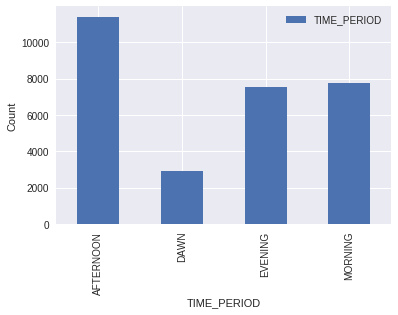

In [98]:
counts_per_time_period = df[['TIME_PERIOD']].groupby(df['TIME_PERIOD']).count()
fig3 = counts_per_time_period.plot.bar()
fig3.set_ylabel("Count")
plt.show()

In [105]:
df[(df["TIME_PERIOD"] == col) & (df["CONDITION_CODE"] == "Had Been Drinking")]

,REPORT_NO,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,SAF_EQUIP_CODE,SEX_CODE,VEHICLE_ID,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE,TIME_PERIOD
2828,MCP2783000G,N,Had Been Drinking,No Misuse,Y,No Injury,b76cee62-4e79-4e4b-83fd-5868da8c1d69,D,Shoulder/Lap Belt(s),M,89f9b6f8-1f89-4ebd-84a3-d0dae2d7a90c,Head On,N,Intersection,Left Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Pickup Truck,Disabling,N,Moving Constant Speed,1,48.0,DAWN
3003,AC1484000R,N,Had Been Drinking,No Misuse,Y,No Injury,eee7e9aa-73de-4527-862d-20a1e050dcad,D,Shoulder/Lap Belt(s),F,1cef65ca-21d1-4921-9abe-7a3f03903127,Same Direction Sideswipe,N,Intersection Related,Left Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Wet,Raining,Seven o'clock,Passenger Car,Superficial,Y,Making Left Turn,2,28.0,DAWN
3009,ADI536000T,N,Had Been Drinking,No Misuse,Y,No Injury,3820ad11-b7b4-4ed0-bdcd-0afcf7155ae4,D,Shoulder/Lap Belt(s),F,4c898588-ae72-4591-89dc-68cf2a6b5063,Opposite Direction Sideswipe,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Not Divided",Dry,Clear,Five o'clock,Van,Superficial,N,Moving Constant Speed,1,50.0,DAWN
3011,AE37140007,N,Had Been Drinking,No Misuse,Y,No Injury,842a5629-e701-4ff2-b3db-a7ba69229179,D,Shoulder/Lap Belt(s),F,b6132de4-c4bb-4498-8476-b5d3f78cc7b5,Single Vehicle,N,Intersection Related,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Not Divided",Dry,Clear,Twelve o'clock,(Sport) Utility Vehicle,Superficial,N,Moving Constant Speed,1,47.0,DAWN
3013,AE47470002,N,Had Been Drinking,No Misuse,Y,No Injury,a3007744-26ff-47d6-88a1-a297d41e0477,D,Shoulder/Lap Belt(s),F,83b5f75c-8ded-479b-9cc9-34d340518808,Single Vehicle,N,Non Intersection,Left Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,(Sport) Utility Vehicle,Disabling,N,Moving Constant Speed,1,46.0,DAWN
3015,AE48850005,N,Had Been Drinking,No Misuse,Y,No Injury,dc3a1dce-0016-4ef3-b50d-6301344acd25,D,Shoulder/Lap Belt(s),F,35d30787-bff8-40d8-b943-6c5f12a41715,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,No Defects,"Two-way, Not Divided",Dry,Clear,Twelve o'clock,(Sport) Utility Vehicle,Disabling,N,Moving Constant Speed,2,45.0,DAWN
3018,CB46080001,N,Had Been Drinking,No Misuse,Y,No Injury,37175207-43c2-4cb5-849e-ea3568c8b0da,D,Shoulder/Lap Belt(s),F,5ab90f15-945c-4fc3-afb3-d87bd57ebe3e,Same Direction Rear End,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Not Divided",Dry,Clear,One o'clock,Passenger Car,Disabling,N,Moving Constant Speed,0,26.0,DAWN
3019,DA35220002,N,Had Been Drinking,No Misuse,Y,No Injury,ab8e70a9-1b5c-4c06-b5aa-78858b6cf2aa,D,Shoulder/Lap Belt(s),F,09106efe-e950-4068-ac20-5f80f64fdf10,Single Vehicle,N,Intersection,Left Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Snow,Snow,Roof Top,Passenger Car,Disabling,N,Moving Constant Speed,3,20.0,DAWN
3024,DA3888000L,N,Had Been Drinking,No Misuse,Y,No Injury,b928ffaa-3e32-4c14-9016-0289ff001994,D,Shoulder/Lap Belt(s),F,b9080aa9-c433-47b2-b373-ea0c7a440c78,Head On,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Not Divided",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,1,42.0,DAWN
3025,DA39420009,N,Had Been Drinking,No Misuse,Y,No Injury,bcee2a52-3541-497e-aa5d-634bfe7549c4,D,Shoulder/Lap Belt(s),F,2f199bf6-10e8-46a0-a324-06c0740b36a8,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Wet,Raining,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,0,27.0,DAWN


In [111]:
total_driking_time_type = df[(df["TIME_PERIOD"] == "AFTERNOON") & (df["CONDITION_CODE"] == "Had Been Drinking")].count()
total_driking_time_type

REPORT_NO                 89
CDL_FLAG                  89
CONDITION_CODE            89
EQUIP_PROB_CODE           89
FAULT_FLAG                89
INJ_SEVER_CODE            89
PERSON_ID                 89
PERSON_TYPE               89
SAF_EQUIP_CODE            89
SEX_CODE                  89
VEHICLE_ID                89
COLLISION_TYPE_CODE       89
C_M_ZONE_FLAG             89
JUNCTION_CODE             89
LANE_CODE                 89
LIGHT_CODE                89
RD_COND_CODE              89
RD_DIV_CODE               89
SURF_COND_CODE            89
WEATHER_CODE              89
AREA_DAMAGED_CODE_MAIN    89
BODY_TYPE_CODE            89
DAMAGE_CODE               89
HIT_AND_RUN_FLAG          89
MOVEMENT_CODE             89
TIME                      89
AGE                       89
TIME_PERIOD               89
dtype: int64

# 어느 시간대에 술취한 사람이 많은지 barplot을 통해서 확인하자

KeyError: 'TIME_PERIOD'

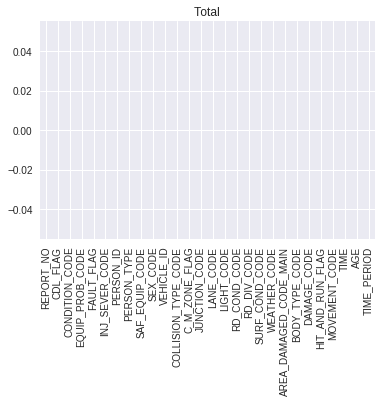

In [107]:
for time in df['TIME_PERIOD'].unique():
    total_driking_time_type = df[(df["TIME_PERIOD"] == col) & (df["CONDITION_CODE"] == "Had Been Drinking")].count()
    total_driking_time_type.plot.bar()
    plt.title("Total")

    no_injury_driking_time_type = no_injury_df[(no_injury_df["TIME_PERIOD"] == col) & (no_injury_df["CONDITION_CODE"] == "Had Been Drinking")].count()
    no_injury_driking_time_type.plot.bar()
    plt.title("No Injury")

    fatal_driking_time_type = fatal_df[(fatal_df["TIME_PERIOD"] == col) & (fatal_df["CONDITION_CODE"] == "Had Been Drinking")].count()
    fatal_driking_time_type.plot.bar()
    plt.title("Fatal")

    disabled_driking_time_type = disabled_df[(disabled_df["TIME_PERIOD"] == col) & (disabled_df["CONDITION_CODE"] == "Had Been Drinking")].count()
    disabled_driking_time_type.plot.bar()
    plt.title("Disabled")
    plt.show()
    print("*"*120)

In [19]:
want_to_drop_cols = ['REPORT_NO',
 'CDL_FLAG',
 'FAULT_FLAG',
 'PERSON_ID',
 'PERSON_TYPE',
 'VEHICLE_ID',
 'HIT_AND_RUN_FLAG',
 'TIME']


In [20]:
appropriate_df = df.drop(want_to_drop_cols, axis = 1)
appropriate_df.tail()

,CONDITION_CODE,EQUIP_PROB_CODE,INJ_SEVER_CODE,SAF_EQUIP_CODE,SEX_CODE,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,MOVEMENT_CODE,AGE,TIME_PERIOD
29588,Apparently Asleep,No Misuse,Possible Incapacitating Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Not Divided",Dry,Clear,One o'clock,Passenger Car,Disabling,Moving Constant Speed,28.0,AFTERNOON
29589,Influenced by Medications and/or Drugs and/or ...,No Misuse,No Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dry,Clear,One o'clock,Passenger Car,Disabling,Moving Constant Speed,42.0,EVENING
29590,Influenced by Medications and/or Drugs and/or ...,No Misuse,No Injury,Shoulder/Lap Belt(s),M,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Dusk,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,One o'clock,(Sport) Utility Vehicle,Superficial,Slowing or Stopping,51.0,EVENING
29591,Influenced by Medications and/or Drugs and/or ...,No Misuse,No Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark No Lights,Loose Surface Material,"Two-way, Not Divided","Mud, Dirt, Gravel",Clear,One o'clock,(Sport) Utility Vehicle,Disabling,Moving Constant Speed,26.0,EVENING
29592,Influenced by Medications and/or Drugs and/or ...,Belt(s) Misused,Possible Incapacitating Injury,Shoulder/Lap Belt(s),M,Single Vehicle,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Divided, Positive Median Barrier",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,Moving Constant Speed,45.0,DAWN


In [21]:
want_to_dummify_cols = []
for col in list(appropriate_df.columns):
    if not col == "AGE":
        want_to_dummify_cols.append(col)

dummified_df = pd.get_dummies(appropriate_df, columns = want_to_dummify_cols)
dummified_df.tail()

,AGE,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,...,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING
29588,28.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29589,42.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29590,51.0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
29591,26.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29592,45.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
want_to_scale_cols = ["AGE"]
scaled_df = dummified_df.copy()
scaled_df["AGE"] = (scaled_df["AGE"].mean() - scaled_df["AGE"])/scaled_df["AGE"].std()

In [23]:
scaled_df.tail()

,AGE,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,...,MOVEMENT_CODE_Right Turn on Red,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING
29588,0.771133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29589,-0.109788,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29590,-0.676095,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
29591,0.896979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29592,-0.298557,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Analysis

In [24]:
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [25]:
z = linkage(scaled_df, 'ward')

In [26]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

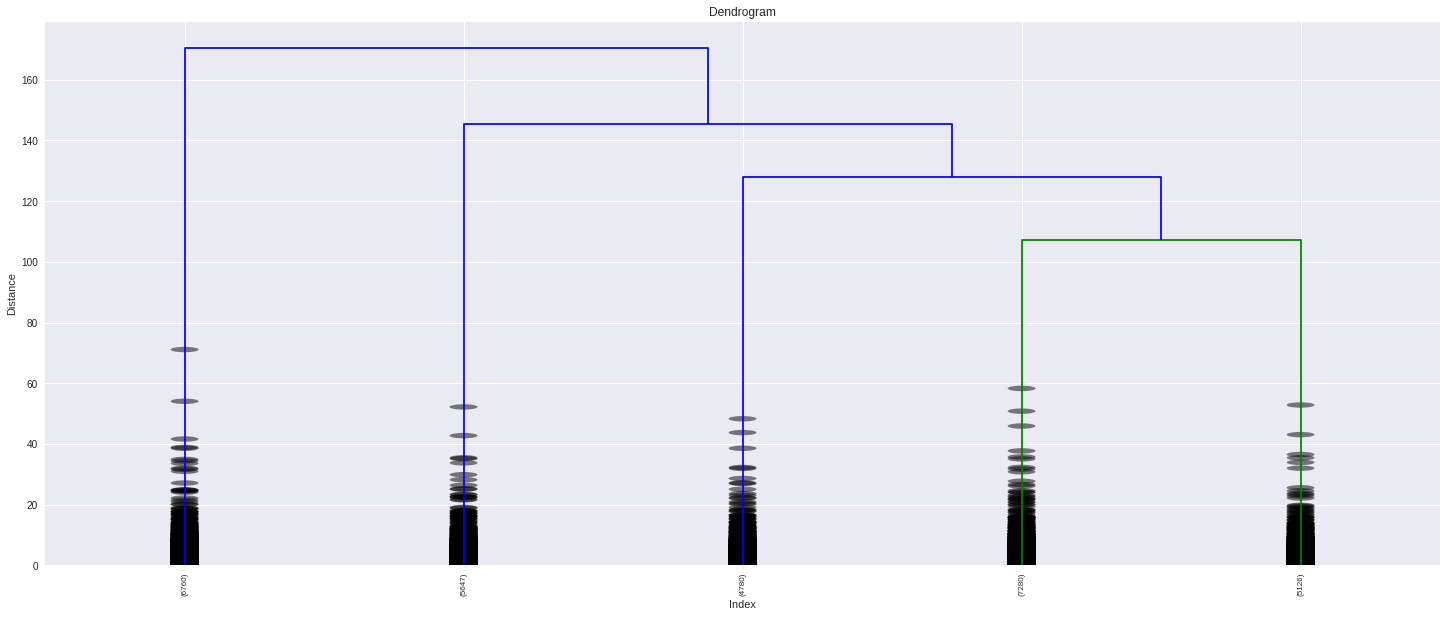

In [27]:
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 5, max_d = 200)

In [29]:
from scipy.cluster.hierarchy import fcluster

predicted_labels = fcluster(z, 90, criterion = 'distance') 
predicted_labels # 0부터가 아니라 1부터 시작함. sklearn과 다름
#predicted_labels.unique()

array([1, 2, 1, ..., 2, 5, 5], dtype=int32)

In [30]:
result_df = scaled_df.copy()
result_df['scipy_hc_labels'] = predicted_labels
result_df.tail()

,AGE,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,...,MOVEMENT_CODE_Skidding,MOVEMENT_CODE_Slowing or Stopping,MOVEMENT_CODE_Starting From Lane,MOVEMENT_CODE_Starting From Parked,MOVEMENT_CODE_Stopped in Traffic Lane,TIME_PERIOD_AFTERNOON,TIME_PERIOD_DAWN,TIME_PERIOD_EVENING,TIME_PERIOD_MORNING,scipy_hc_labels
29588,0.771133,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
29589,-0.109788,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
29590,-0.676095,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2
29591,0.896979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
29592,-0.298557,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,5


In [31]:
#component_check_df = result_df.copy()
#component_check_df["AGE"] = df["AGE"]
#component_check_df.tail()

In [32]:
component_check_df = appropriate_df.copy()
component_check_df['scipy_hc_labels'] = predicted_labels

In [33]:
for cluster in component_check_df['scipy_hc_labels'].unique():
    print("\ncluster",cluster,"\n")
    print(component_check_df[component_check_df['scipy_hc_labels'] == cluster].mean().sort_values(ascending=False)[:20])


cluster 1 

AGE                39.159615
scipy_hc_labels     1.000000
dtype: float64

cluster 2 

AGE                42.32318
scipy_hc_labels     2.00000
dtype: float64

cluster 5 

AGE                34.92977
scipy_hc_labels     5.00000
dtype: float64

cluster 4 

AGE                32.628159
scipy_hc_labels     4.000000
dtype: float64

cluster 3 

AGE                56.688494
scipy_hc_labels     3.000000
dtype: float64


In [34]:
pd.value_counts(result_df['scipy_hc_labels'].values, sort=False)

1    6760
2    5647
3    4780
4    7280
5    5126
dtype: int64

# Decesion Tree

In [35]:
X, y = result_df.drop('scipy_hc_labels', axis = 1), result_df['scipy_hc_labels']

In [36]:
from sklearn.tree import DecisionTreeClassifier

class_weight = 'balanced'
max_depth = 3

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 77, stratify = y)

In [38]:
# dt_model 
dt_model = DecisionTreeClassifier(class_weight = class_weight, max_depth = max_depth)

In [39]:
# fit to model
dt_model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
dt_model.predict(X = X_test)

array([2, 1, 4, ..., 4, 4, 5], dtype=int32)

In [41]:
dt_model.score(X = X_test, y = y_test)

0.72631436680632522

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred = dt_model.predict(X = X_test), y_true = y_test)

array([[1618,   30,    0,   31,   11],
       [  17, 1242,    0,   90,   63],
       [  48,   44,    0,  900,  203],
       [  67,   93,    0, 1464,  196],
       [  56,   41,    0,  135, 1050]])

# Visualization

In [43]:
from sklearn.tree import export_graphviz
import graphviz

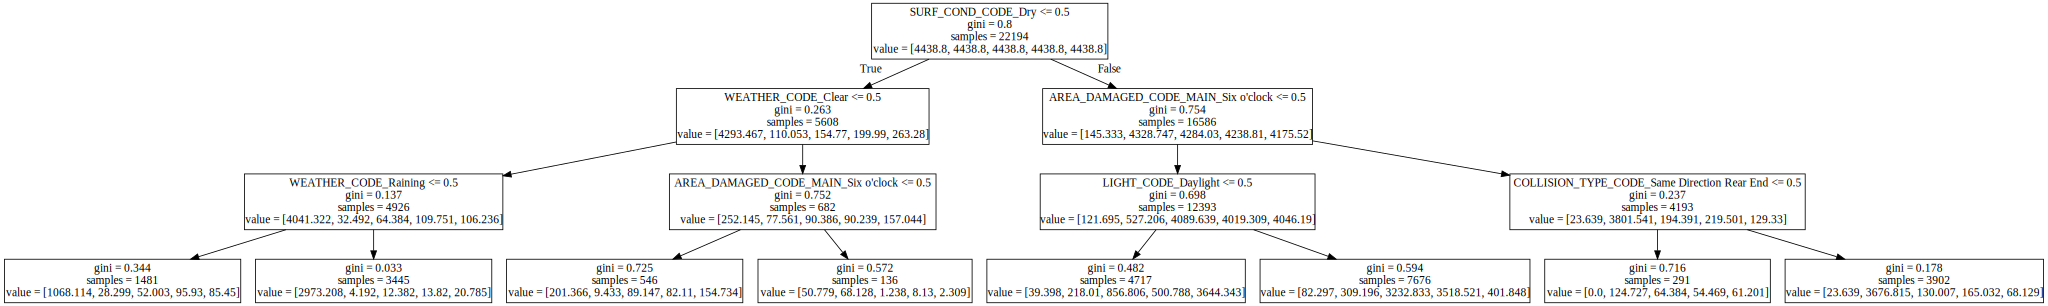

In [44]:
with open('test_tree.dot', "w") as f:
    export_graphviz(dt_model, f, feature_names = X.columns)
    
with open('test_tree.dot', 'r') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)